In [1]:
%load_ext sql

In [2]:
import pandas as pd
from IPython.display import Image
import matplotlib 
from matplotlib import pyplot as plt

If necessary, change the following line to the correct filename. No quotation marks are needed!

In [3]:
%sql sqlite:///Bank_post.sqlite

In [4]:
%sql SELECT * FROM sqlite_master;

 * sqlite:///Bank_post.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,customers,customers,2,"CREATE TABLE customers ( ""Age"" BIGINT, ""Experience"" BIGINT, ""Income"" BIGINT, ""BranchAddress"" TEXT, ""Branch Manager"" TEXT, ""Family"" BIGINT, ""CCAvg"" TEXT, ""Mortgage"" TEXT, ""PersonalLoan"" BIGINT, ""Brokerage Account"" BIGINT, ""GIC Account"" BIGINT, ""Online"" BIGINT, ""CreditCard"" BIGINT, ""AdvisorName"" TEXT, ""Advisor Designation"" TEXT, ""Branch Address 1"" TEXT, ""Branch Manager 1"" TEXT, ""Branch Address 2"" TEXT, ""Branch Manager 2"" TEXT, ""Branch Address 3"" TEXT, ""Branch Manager 3"" TEXT, ""Branch Address 4"" FLOAT, ""Branch Manager 4"" FLOAT)"


### Let's remove some spaces in some column names:

In [5]:
%sql ALTER TABLE customers RENAME COLUMN "Advisor Name" to AdvisorName;

 * sqlite:///Bank_post.sqlite
(sqlite3.OperationalError) near "Name": syntax error
[SQL: ALTER TABLE customers RENAME COLUMN Advisor Name to AdvisorName;]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [6]:
%sql ALTER TABLE customers RENAME COLUMN "Branch Address" to BranchAddress;

 * sqlite:///Bank_post.sqlite
(sqlite3.OperationalError) near "Address": syntax error
[SQL: ALTER TABLE customers RENAME COLUMN Branch Address to BranchAddress;]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [7]:
%sql ALTER TABLE customers RENAME COLUMN "Personal Loan" to PersonalLoan;

 * sqlite:///Bank_post.sqlite
(sqlite3.OperationalError) near "Loan": syntax error
[SQL: ALTER TABLE customers RENAME COLUMN Personal Loan to PersonalLoan;]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


# A) Database design and SQL 

i)	<b>What are the entities of the given scenario?</b>

Entities are things that exist. Several answers may have been posed, as long as they are consistent. <br> 
<br> 
Entity Customer, with attributes: age, experience, income, branch Address, Family, CCAvg, Mortgage, Personal Loan, Brokerage Account, GIC, Online, Credit Card, Advisor Name <br> 

Entity Branch, with attributes branch address, branch managers <br> 

Entity Advisor, with attributes: Advisor Name, Advisor Designation, Branch i, Branch Manager i

ii)	<b>This data set is not in Boyce-Codd Normal Form (BCNF). Explain why not.</b> 

A BCNF dataset is a relation in its third normal form (3NF). To be 3NF, a dataset needs to be in its first normal form, second normal form, with its only determinants are candidate keys. A determinant is an attribute (or collection) that functionally determines another attribute.

Let's analyze:

The dataset is in 1NF: there are not repeating groups (for example, stacked branch and branch manager i in a single cell would not be 1NF)

The dataset is in 2NF: All non key attributes are dependent on some of the primary keys (which we'll define as the entities)

The dataset is not in 3NF: A dataset is in 3NF if the only determinants it contains are candidate keys. A candidate key (unique identifiers for a table). <br>
In our case, you can see that <br>
a) 'Advisor Name' keeps repeating for many different customers. Meaning that branch manager i and branch address i could be determined by advisor name, which should be a primary key <br>
b) 'Branch Manager' and  keeps also repeating, meaning that it could be determiend by a branch unique id/Address


<b> iii) Transform the given data set into a database in BCNF. Draw an Entity-Relationship diagram of your resulting database</b>

In [8]:
# MANY customers share ONE advisor
# MANY adsvisors serve MANY branches
# ONE Branch has MANY customers

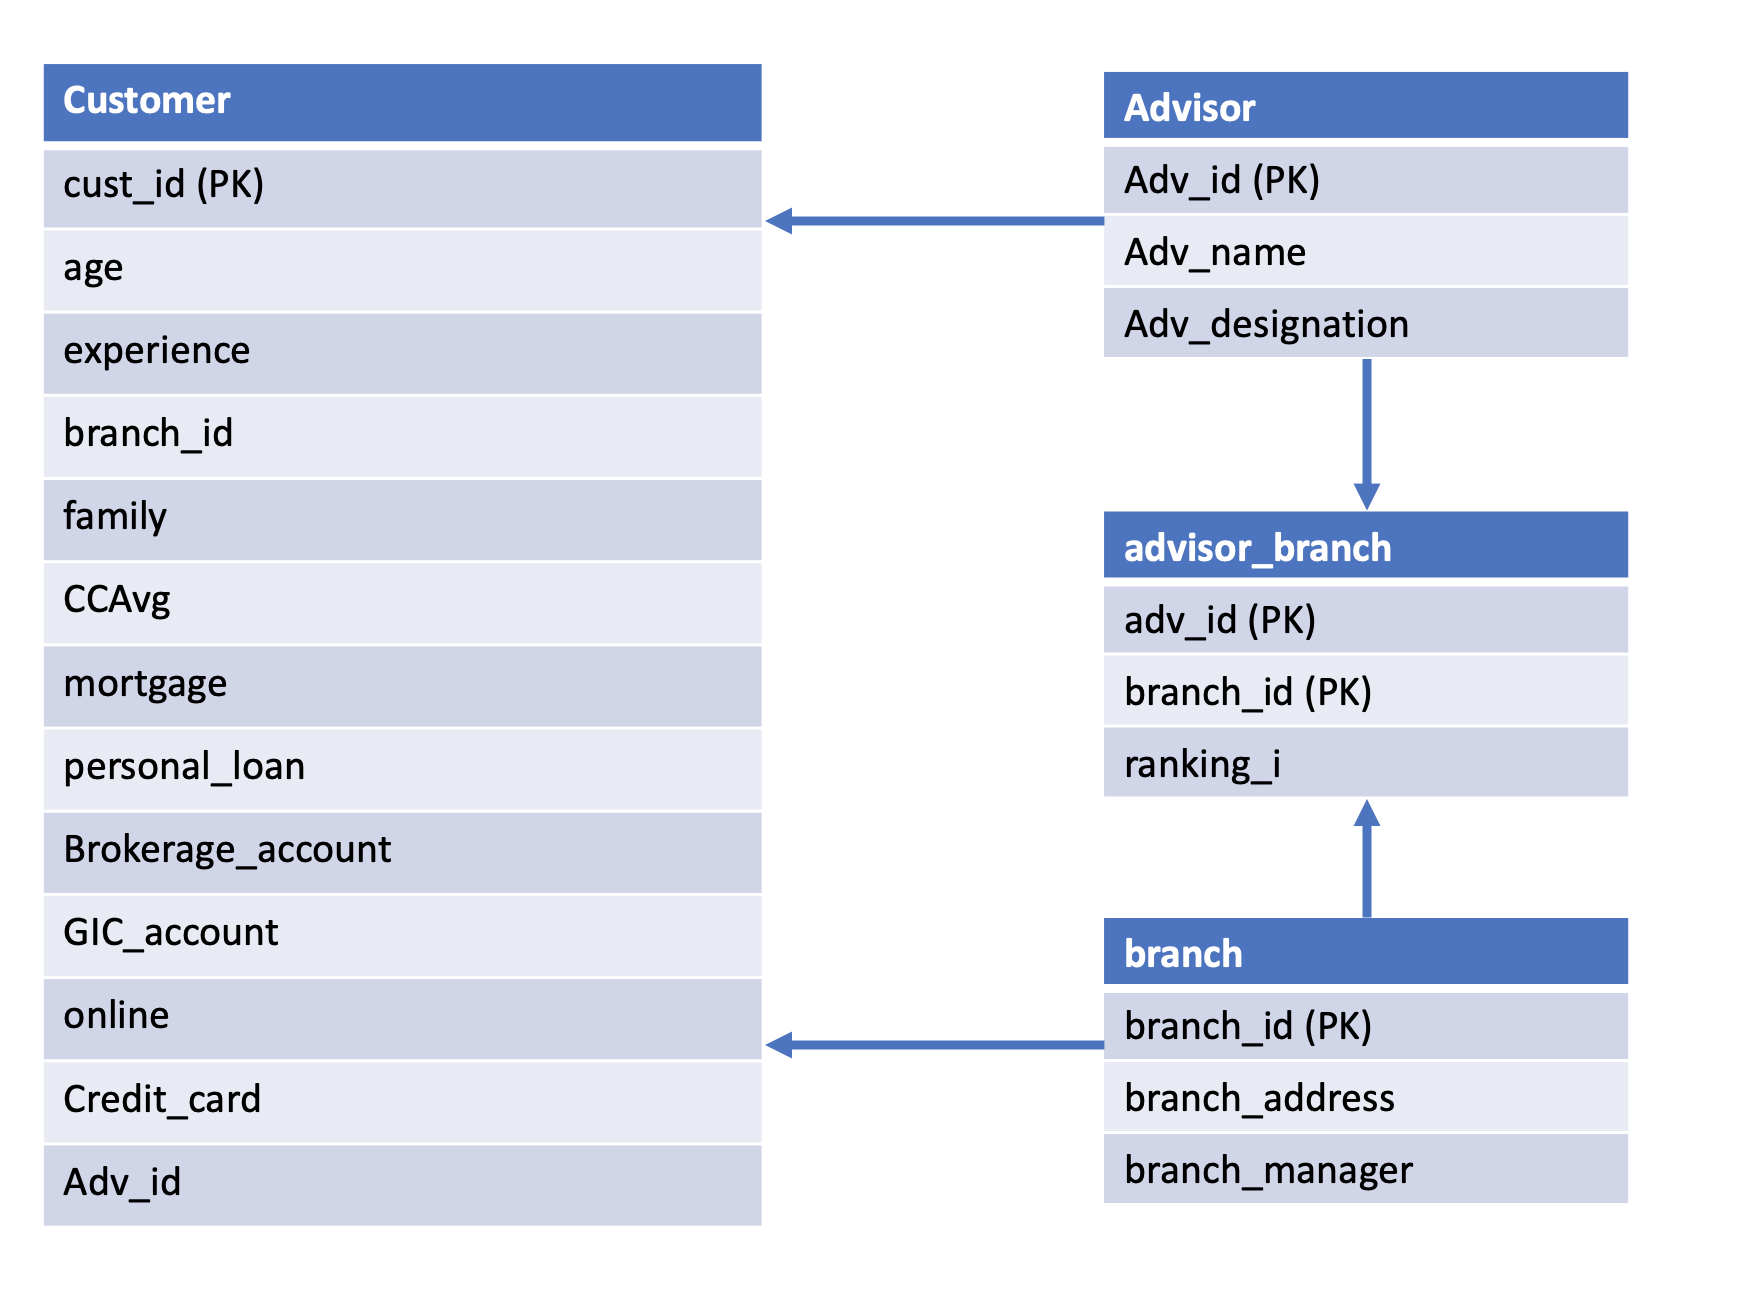

In [9]:
# With "ids" being created
Image(filename='diagram_post.png', width=500) 

<b>iv)	Write SQL code that creates the necessary table(s) within the database. </b><br>
#Customer:
CREATE TABLE customer( age experience branch_id family CCAvg mortgage personal_loan brokerage_account GIC_account online credit_card adv_id .....

<b> v)	… all financial advisors.</b>

In [10]:
%sql SELECT distinct AdvisorName FROM customers order by AdvisorName asc;

 * sqlite:///Bank_post.sqlite
Done.


AdvisorName
Aleida Suitt
Beatriz Rolf
Bernarda Guilliams
Berry Gartman
Brandon Sum
Caitlin Wimmer
Carolin Whitmire
Carylon Race
Cecil Caves
Collene Dubon


<b> vi)	… Age, Experience, Income and Mortgage of customers who have a mortgage.</b>

In [11]:
%sql SELECT age, Experience, Income, Mortgage FROM customers where Mortgage <> 0 order by Mortgage asc;

 * sqlite:///Bank_post.sqlite
Done.


Age,Experience,Income,Mortgage
63,38,22,$90
38,12,91,100
63,39,32,100
30,6,42,100
43,16,65,100
61,36,40,100
32,6,85,100
63,38,9,100
36,11,14,100
53,26,22,100


<b> vii)	… the number of all customers for each branch. </b>

In [12]:
%sql SELECT BranchAddress, count(*) as num_customers FROM customers group by BranchAddress order by num_customers asc;

 * sqlite:///Bank_post.sqlite
Done.


BranchAddress,num_customers
890 W. Brickyard Dr.,41
14 Lakeshore Lane,75
8722 Richardson Street,76
544 Edgewood Drive,80
76 Mayfair St.,82
667 E. Hall St.,83
218 S. Westport Court,85
9587 SW. Jefferson Street,85
387 West Fifth Ave.,86
8573 Princeton Road,87


<b> viii)	… the maximum of the average credit card spending over all customer that took a personal loan.</b>



In [13]:
# Assuming CCAvg is all numbers and it's properly ordeable
%sql select CCAvg from customers where PersonalLoan <> 0 order by CCAvg desc limit 1;

 * sqlite:///Bank_post.sqlite
Done.


CCAvg
9.3


In [14]:
# OR
%sql select max(CCAVg) from (select CCAvg from customers where PersonalLoan <> 0);

 * sqlite:///Bank_post.sqlite
Done.


max(CCAVg)
9.3


<b> ix)	Only consider advisors whose number of customers is more than half of the overall average number of customers per advisor. List these advisors and the mean income of their customers combined in descending order (by mean income). </b>

In [15]:
# Subquery, not the answer.
#%%sql 
#SELECT AVG(numc) 
#FROM (select AdvisorName, count(*) as numc 
#      from customers group by AdvisorName);

In [16]:
%%sql
SELECT AdvisorName, count(*) as num_customers, avg(Income) as avgIncome  
from customers group by AdvisorName 
having num_customers > 0.5*(SELECT AVG(numc) from (select AdvisorName, count(*) as numc from customers group by AdvisorName))
order by avgIncome desc;

 * sqlite:///Bank_post.sqlite
Done.


AdvisorName,num_customers,avgIncome
Zofia Rambo,108,84.99074074074075
Pansy Diblasi,87,82.19540229885058
Erik Clinard,91,82.05494505494505
Kathaleen Horgan,100,81.75
Kirsten Mitchem,80,80.8
Jodie Izquierdo,88,80.43181818181819
Corazon Eastin,119,80.41176470588235
Donetta Mallet,88,79.5909090909091
Kristle Hanby,100,79.36
Pete Dickens,84,79.27380952380952


# B)	(8 points) Data Cleaning and Basic Data Exploration
You must use Python to perform the analysis and generate the graphs.


<b>Carefully inspect and clean the data. Use simple descriptive statistics and basic univariate plots. Report your findings and how you resolved any potential issues.</b>

In [17]:
result = %sql SELECT * FROM customers;
original_df = result.DataFrame()

 * sqlite:///Bank_post.sqlite
Done.


In [18]:
original_df.head()

,Age,Experience,Income,BranchAddress,Branch Manager,Family,CCAvg,Mortgage,PersonalLoan,Brokerage Account,...,AdvisorName,Advisor Designation,Branch Address 1,Branch Manager 1,Branch Address 2,Branch Manager 2,Branch Address 3,Branch Manager 3,Branch Address 4,Branch Manager 4
0,50,24,11,8536 Country Club Dr.,Derek,4,0.6,0,0,0,...,Tanya Johansen,CFP,8536 Country Club Dr.,Derek,234 Blue Spring Rd.,Ana,533 Hillcrest Street,Ankur,None,None
1,31,7,173,742 Bridle Street,Joonki,1,6,0,0,0,...,Brandon Sum,CFP,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip,None,None
2,41,16,10,9091 S. Bowman Street,Fraser,2,0.3,0,0,0,...,Kathaleen Horgan,PFP,9091 S. Bowman Street,Fraser,8378 West Magnolia Street,Rajarshi,518 Selby Ave.,Xavier,None,None
3,53,27,44,9834 East Pineknoll Ave.,Rahul,4,1.5,0,0,0,...,Brandon Sum,CFP,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip,None,None
4,29,5,33,69 Spruce Dr.,Mostapha,1,1.8,78,0,0,...,Kirsten Mitchem,PFP,69 Spruce Dr.,Mostapha,92 Ridgewood Dr.,Mark,8376 Euclid Lane,Jessica,None,None


In [19]:
original_df.dtypes

Age                     int64
Experience              int64
Income                  int64
BranchAddress          object
Branch Manager         object
Family                  int64
CCAvg                  object
Mortgage               object
PersonalLoan            int64
Brokerage Account       int64
GIC Account             int64
Online                  int64
CreditCard              int64
AdvisorName            object
Advisor Designation    object
Branch Address 1       object
Branch Manager 1       object
Branch Address 2       object
Branch Manager 2       object
Branch Address 3       object
Branch Manager 3       object
Branch Address 4       object
Branch Manager 4       object
dtype: object

In [20]:
original_df.describe()

,Age,Experience,Income,Family,PersonalLoan,Brokerage Account,GIC Account,Online,CreditCard
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,45.268282,20.028895,74.303401,2.398088,0.106690,0.108691,0.064903,0.592132,0.296733
std,11.454680,11.461481,46.310561,1.147040,0.308754,0.311286,0.246383,0.491493,0.456868
min,23.000000,-3.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Cleaning CCAVG

In [22]:
df = original_df.copy()

In [23]:
#Changing names
new_column_names = ['age','experience',    
'income',    
'branch_address',    
'branch_manager',    
'family',    
'ccavg',    
'mortgage',    
'personal_loan',    
'brokerage_account',    
'gic',    
'online',    
'credit_card',    
'advisor_name',    
'advisor_designation',    
'branch_address1',    
'branch_manager1',    
'branch_address2',    
'branch_manager2',    
'branch_address3',    
'branch_manager3',    
'branch_address4',    
'branch_manager4', ]
df.columns = new_column_names

In [24]:
df.dtypes

age                     int64
experience              int64
income                  int64
branch_address         object
branch_manager         object
family                  int64
ccavg                  object
mortgage               object
personal_loan           int64
brokerage_account       int64
gic                     int64
online                  int64
credit_card             int64
advisor_name           object
advisor_designation    object
branch_address1        object
branch_manager1        object
branch_address2        object
branch_manager2        object
branch_address3        object
branch_manager3        object
branch_address4        object
branch_manager4        object
dtype: object

In [25]:
df['ccavg'].unique()

array(['0.6', '6', '0.3', '1.5', '1.8', '3.4', '1.7', '0.2', '1.1', '2.8',
       '4.1', '4.7', '3', '1.9', '0.8', '0.4', '1', '2.1', '2.6', '6.9',
       '2.3', '1.6', '4.9', '0.1', '0', '2.5', '2', '1.666666667', '2.9',
       '4.4', '5.7', '7.3', '8.6', '3.6', '6.6', '2.2', '4.3', '3.9',
       '5.5', '1.4', '0.5', '6.1', '2.7', '6.666666667', '6.7',
       '1.333333333', '5.1', '0.9', '3.8', '3.3', '3.1', '6.8', '0.7',
       '2.666666667', '1.2', '1.3', '2.4', '8', '6.3', '3.2', '4.5',
       '1.75', '7', '7.9', '5.3', '8.8', '4', '5.2', '3.7', '4.6', '6.5',
       '0.75', '9', '4.2', '7.2', '0.666666667', '7.8', '5.4', '7.5',
       '5.8', '4.75', '3.5', '7.4', '7.6', '2.333333333', '5.6',
       '4.333333333', '8.1', '4.666666667', '5', '5.9', '4.8',
       '5.333333333', '10', '5.666666667', '6.333333333', '8.5',
       '3.333333333', '8.2', '8.9', '8.3', '6.4', '4.25', '3.666666667',
       '3.25', '6.2', '2,00', '2.75', '9.3'], dtype=object)

In [26]:
# As seen, some values have comas indicating thousands. We will assume that 2,00 represents 2,000

In [27]:
df[['ccavg']] = df['ccavg'].str.replace(',', '.')
#df['ccavg'].unique()

In [28]:
df[['ccavg']] = pd.to_numeric(df['ccavg'])
df['ccavg'].unique()

array([ 0.6       ,  6.        ,  0.3       ,  1.5       ,  1.8       ,
        3.4       ,  1.7       ,  0.2       ,  1.1       ,  2.8       ,
        4.1       ,  4.7       ,  3.        ,  1.9       ,  0.8       ,
        0.4       ,  1.        ,  2.1       ,  2.6       ,  6.9       ,
        2.3       ,  1.6       ,  4.9       ,  0.1       ,  0.        ,
        2.5       ,  2.        ,  1.66666667,  2.9       ,  4.4       ,
        5.7       ,  7.3       ,  8.6       ,  3.6       ,  6.6       ,
        2.2       ,  4.3       ,  3.9       ,  5.5       ,  1.4       ,
        0.5       ,  6.1       ,  2.7       ,  6.66666667,  6.7       ,
        1.33333333,  5.1       ,  0.9       ,  3.8       ,  3.3       ,
        3.1       ,  6.8       ,  0.7       ,  2.66666667,  1.2       ,
        1.3       ,  2.4       ,  8.        ,  6.3       ,  3.2       ,
        4.5       ,  1.75      ,  7.        ,  7.9       ,  5.3       ,
        8.8       ,  4.        ,  5.2       ,  3.7       ,  4.6 

In [29]:
# Cleaning Mortgage

In [30]:
df['mortgage'].unique()
df[['mortgage']] = df['mortgage'].str.replace('$','')
df[['mortgage']] = pd.to_numeric(df['mortgage'])
df['mortgage'].unique()

array([  0,  78, 185, 118, 380, 186, 248, 148, 146, 132,  94, 175, 123,
       345, 223,  95, 147, 263, 100, 182, 110,  96,  87, 103,  77, 105,
        86, 102, 236, 149, 112, 329, 171, 222, 323, 174,  88, 212, 203,
       140, 219,  83, 325, 159, 117, 328, 257, 152, 156, 366, 256, 119,
       151, 200, 104, 342, 144, 137, 154, 355, 125, 309, 127, 120, 107,
        99, 138, 106, 181, 109, 249, 131,  82, 143, 322, 428, 158, 167,
       315, 122, 319, 601, 378,  81, 368, 475,  79, 136, 113, 188, 184,
       130, 239, 179, 180, 218, 145, 292, 240, 214, 565, 190, 111, 114,
       205, 221, 297,  91, 202, 364, 169, 271, 101, 421, 172, 213, 189,
       238, 244, 241, 142, 294, 308, 293, 178, 230, 307, 262, 176, 164,
       116, 577, 134, 255, 187, 129, 217, 305, 135,  98,  90, 242, 277,
        75, 477, 193,  76,  97,  85,  93, 582, 224, 150,  92, 229, 403,
       245, 204, 282, 246, 157, 124,  89, 331, 408, 310, 250, 357, 243,
        80, 266, 273, 481, 162, 220, 227, 612, 547, 165, 416, 50

In [31]:
# Cleaning Experience
df[['experience']] = df['experience'].abs()

In [32]:
df.describe()

,age,experience,income,family,ccavg,mortgage,personal_loan,brokerage_account,gic,online,credit_card
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,45.268282,20.056457,74.303401,2.398088,1.951830,56.085575,0.106690,0.108691,0.064903,0.592132,0.296733
std,11.454680,11.413172,46.310561,1.147040,1.756476,101.788264,0.308754,0.311286,0.246383,0.491493,0.456868
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.600000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,2.600000,99.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Checking for unique on dummy vars
df['personal_loan'].unique() 
#etc...

array([0, 1], dtype=int64)

In [34]:
df.dtypes

age                      int64
experience               int64
income                   int64
branch_address          object
branch_manager          object
family                   int64
ccavg                  float64
mortgage                 int64
personal_loan            int64
brokerage_account        int64
gic                      int64
online                   int64
credit_card              int64
advisor_name            object
advisor_designation     object
branch_address1         object
branch_manager1         object
branch_address2         object
branch_manager2         object
branch_address3         object
branch_manager3         object
branch_address4         object
branch_manager4         object
dtype: object

In [35]:
# Sanitizing Strings, without designation
string_columns = ['branch_address', 'branch_manager','advisor_name','branch_address1', 'branch_manager1', 'branch_address2','branch_manager2', 'branch_address3', 'branch_manager3','branch_address4', 'branch_manager4']
#string_columns
#df.columns
df[string_columns] = df[string_columns].astype(str)
df[string_columns] = df[string_columns].apply(lambda x: x.str.title())
df[string_columns]

,branch_address,branch_manager,advisor_name,branch_address1,branch_manager1,branch_address2,branch_manager2,branch_address3,branch_manager3,branch_address4,branch_manager4
0,8536 Country Club Dr.,Derek,Tanya Johansen,8536 Country Club Dr.,Derek,234 Blue Spring Rd.,Ana,533 Hillcrest Street,Ankur,Nan,Nan
1,742 Bridle Street,Joonki,Brandon Sum,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip,Nan,Nan
2,9091 S. Bowman Street,Fraser,Kathaleen Horgan,9091 S. Bowman Street,Fraser,8378 West Magnolia Street,Rajarshi,518 Selby Ave.,Xavier,Nan,Nan
3,9834 East Pineknoll Ave.,Rahul,Brandon Sum,9834 East Pineknoll Ave.,Rahul,742 Bridle Street,Joonki,544 Edgewood Drive,Filip,Nan,Nan
4,69 Spruce Dr.,Mostapha,Kirsten Mitchem,69 Spruce Dr.,Mostapha,92 Ridgewood Dr.,Mark,8376 Euclid Lane,Jessica,Nan,Nan
...,...,...,...,...,...,...,...,...,...,...,...
4494,14 Lakeshore Lane,Yuqi,Val Sauceda,14 Lakeshore Lane,Yuqi,890 W. Brickyard Dr.,Huimin,,,Nan,Nan
4495,667 E. Hall St.,Van,Eulah Kicklighter,667 E. Hall St.,Van,68 Sunbeam St.,Vitor,7330 West Grand St.,Utsav,Nan,Nan
4496,8017 Homestead Ave.,Bhavya,Margret Lan,8017 Homestead Ave.,Bhavya,387 West Fifth Ave.,Zhuo,8536 Country Club Dr.,Derek,Nan,Nan
4497,8722 Richardson Street,Oleg,Cyril Murry,8722 Richardson Street,Oleg,5 Maple Lane,Congyi,24 Trusel Court,Timothy,Nan,Nan


In [36]:
df.dtypes

age                      int64
experience               int64
income                   int64
branch_address          object
branch_manager          object
family                   int64
ccavg                  float64
mortgage                 int64
personal_loan            int64
brokerage_account        int64
gic                      int64
online                   int64
credit_card              int64
advisor_name            object
advisor_designation     object
branch_address1         object
branch_manager1         object
branch_address2         object
branch_manager2         object
branch_address3         object
branch_manager3         object
branch_address4         object
branch_manager4         object
dtype: object

In [37]:
#df.head()
df.describe()

,age,experience,income,family,ccavg,mortgage,personal_loan,brokerage_account,gic,online,credit_card
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,45.268282,20.056457,74.303401,2.398088,1.951830,56.085575,0.106690,0.108691,0.064903,0.592132,0.296733
std,11.454680,11.413172,46.310561,1.147040,1.756476,101.788264,0.308754,0.311286,0.246383,0.491493,0.456868
min,23.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.600000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,99.000000,3.000000,2.600000,99.500000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,617.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 0, 'Values')

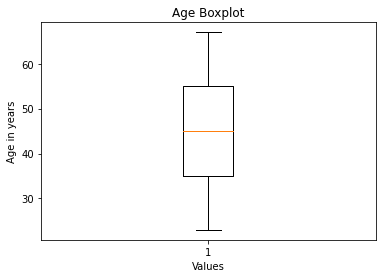

In [38]:
#Examples of univariate plots
plt.boxplot(df['age'])
plt.title("Age Boxplot")
plt.ylabel("Age in years")
plt.xlabel("Values")

Text(0.5, 0, 'Income in $000')

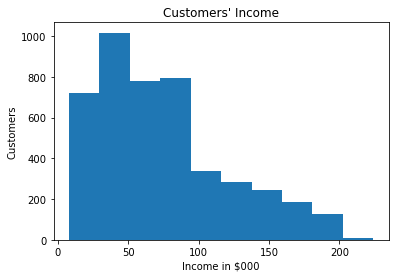

In [39]:
plt.hist(df['income'])
plt.title("Customers' Income")
plt.ylabel("Customers")
plt.xlabel("Income in $000")

Text(0.5, 0, 'Has Banked Online')

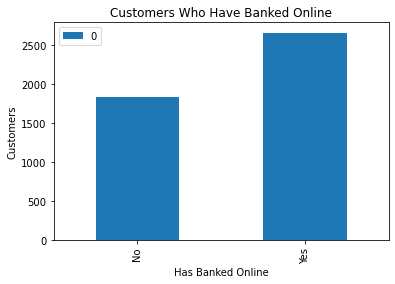

In [40]:
df_online = pd.DataFrame(df.groupby('online').size())
df_online.rename(index={0:'No',1:'Yes'}, inplace=True)

ax = df_online.plot(kind='bar')
plt.show
plt.title("Customers Who Have Banked Online")
plt.ylabel("Customers")
plt.xlabel("Has Banked Online")

## C)	(8 points) Exploratory Data Analysis
You must use Python to perform the analysis and generate the graphs. </b>

The bank's main goal is to conver lenders into borrowers. For that, most of the analysis should be conducted trying to identify the differences between lenders and borrowers

In [41]:
# Examples of analysis

In [42]:
has_loan = df['personal_loan'] != 0
df_loan_gic = pd.DataFrame(df.groupby(['personal_loan', 'gic']).size())
df_loan_gic

0
personal_loan gic      
0             0    3867
              1     152
1             0     340
              1     140

Text(0.5, 0, 'Has Banked Online')

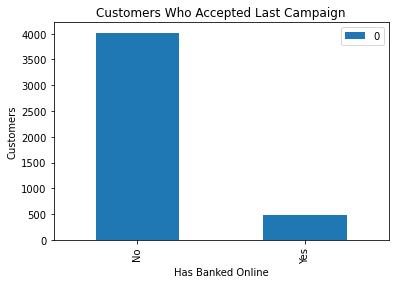

In [43]:
df_loan = pd.DataFrame(df.groupby('personal_loan').size())
df_loan.rename(index={0:'No',1:'Yes'}, inplace=True)

ax = df_loan.plot(kind='bar')
plt.show
plt.title("Customers Who Accepted Last Campaign")
plt.ylabel("Customers")
plt.xlabel("Has Banked Online")

In [44]:
df_hasloan  = df[(df.personal_loan != 0)]
df_hasnotloan  = df[(df.personal_loan == 0)]

Text(0.5, 1.0, 'Customer age by campaign success')

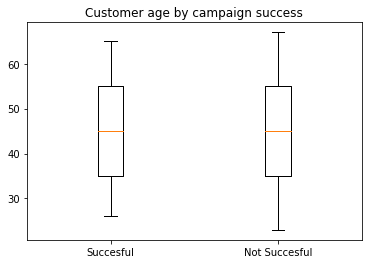

In [45]:
ax = plt.boxplot([df_hasloan['age'], df_hasnotloan['age']], labels=['Succesful','Not Succesful'])
plt.title("Customer age by campaign success")

Text(0, 0.5, 'Income $ 000')

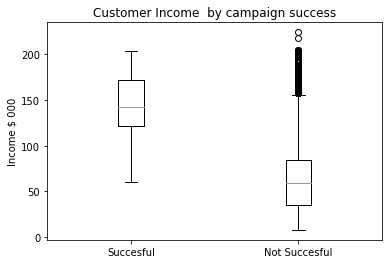

In [46]:
ax = plt.boxplot([df_hasloan['income'], df_hasnotloan['income']], labels=['Succesful','Not Succesful'])
plt.title("Customer Income  by campaign success")
plt.ylabel("Income $ 000")

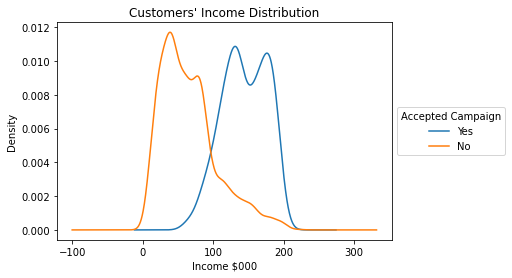

In [47]:
ax1 = df_hasloan['income'].plot(kind='density', sharex=False)
ax2 = df_hasnotloan['income'].plot(kind='density', sharex=False)
plt.title("Customers' Income Distribution")
plt.xlabel("Income $000")
plt.legend(labels=['Yes','No'],title = 'Accepted Campaign',loc='center left', bbox_to_anchor=(1, 0.5))

Text(0, 0.5, 'Credit Card Average $ 000')

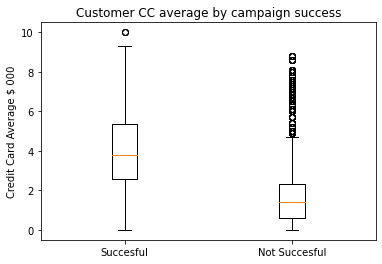

In [48]:
ax = plt.boxplot([df_hasloan['ccavg'], df_hasnotloan['ccavg']], labels=['Succesful','Not Succesful'])
plt.title("Customer CC average by campaign success")
plt.ylabel("Credit Card Average $ 000")

In [49]:
# There's seem to be a correlation between income and having accepted the campaign. This makes economical sense, as bigger incomes may wish to borrow money for specific projects....

# D)	(10 points) Business Analytics
You must use Python to perform the analysis and generate the graphs.
Who is or are the most successful financial advisor(s)? Discuss your results.
Hint: How could “successful” be defined? There might be multiple possible definitions.


In [50]:
# Examples of analysis:
# Defined succesful by having the biggest incomes or number of customers
# Define sucessful by versatility: working with a large range of customers and branches
# Define succesful by converting clients with the campaign

In [51]:
df_d = pd.DataFrame(df.groupby(['personal_loan', 'advisor_name']).size())
#df_d.columns = ['personal_loan','advisor_name','num_customers']
df_d
df_d = df_d.unstack(level=0)
df_d.columns=['noloan','loan']
df_d
df_d['total_customers'] = df_d['noloan'] +df_d['loan']
df_d['conversion_rate'] = round((df_d['loan'] / df_d['total_customers']),3)
df_d.sort_values('conversion_rate', ascending=False)

,noloan,loan,total_customers,conversion_rate
advisor_name,,,,
Jodie Izquierdo,73,15,88,0.170
Gita Pinelli,72,14,86,0.163
Siobhan Flaugher,60,11,71,0.155
Kirsten Mitchem,68,12,80,0.150
Pansy Diblasi,74,13,87,0.149
Zofia Rambo,92,16,108,0.148
Val Sauceda,66,11,77,0.143
Jacqueline Leveque,84,14,98,0.143
Estefana Dungan,93,14,107,0.131


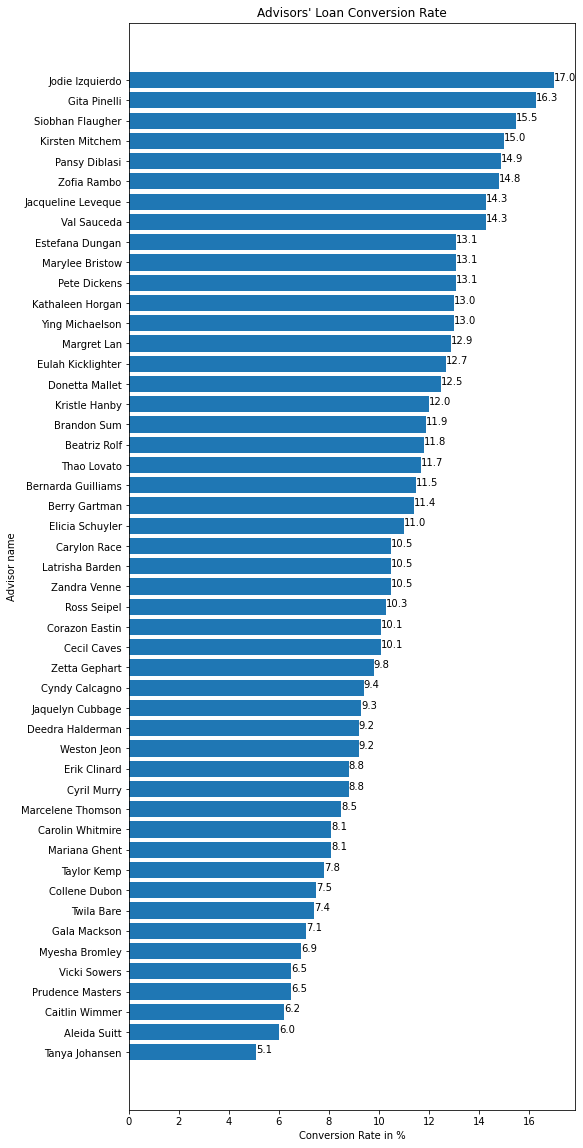

In [52]:
df_chart = pd.DataFrame(df_d.sort_values('conversion_rate', ascending=True))
fig= plt.figure(figsize=(8,20))
plt.barh(df_chart.index,round(100*(df_chart['conversion_rate']),3))
plt.title("Advisors' Loan Conversion Rate")
plt.xlabel("Conversion Rate in %")
plt.ylabel("Advisor name")

#labels = df_chart['conversion_rate'].tolist()

for x, y in zip((round(100*(df_chart['conversion_rate']),3)),df_chart.index):
    #label = '{0:.1%}'.format(x)
    plt.annotate(x, (x,y))
